In [ ]:
# Môi trường Python 3 này được cài đặt nhiều thư viện phân tích
# Nó được xác định bởi hình ảnh kaggle/python Docker: https://github.com/kaggle/docker-python
# Ví dụ: đây là một số gói hữu ích để tải

import numpy as np # đại số tuyến tính
import pandas as pd # xử lý dữ liệu, CSV file I/O (e.g. pd.read_csv)

# Các tệp dữ liệu đầu vào có sẵn ở dạng chỉ đọc"./input/" directory
# Ví dụ: chạy cái này (bằng cách nhấp vào chạy hoặc nhấn Shift + Enter) sẽ liệt kê tất cả các tệp trong thư mục đầu vào

import os
for dirname, _, filenames in os.walk('./drive/MyDrive/Colab Notebooks/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Bạn có thể ghi tối đa 20GB vào thư mục hiện tại (/input/working/) được giữ nguyên dưới dạng đầu ra khi bạn tạo phiên bản bằng cách sử dụng "Save & Run All"
# Bạn cũng có thể ghi các tệp tạm thời vào /input/temp/, nhưng chúng sẽ không được lưu bên ngoài phiên hiện tại

./drive/MyDrive/Colab Notebooks/input/hepatitis-c-dataset/HepatitisCdata.csv
./drive/MyDrive/Colab Notebooks/input/hepatitis-c-dataset/gb_scaler.sav
./drive/MyDrive/Colab Notebooks/input/hepatitis-c-dataset/gb_model.sav


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

style.use("fivethirtyeight")

In [ ]:
df=pd.read_csv('./drive/MyDrive/Colab Notebooks/input/hepatitis-c-dataset/HepatitisCdata.csv')

In [ ]:
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
print(df.isnull().sum())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [ ]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df = df.drop('Unnamed: 0', axis=1)

print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})

df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
# Giá trị đếm của các biến phân loại
print(df['Category'].value_counts())
print(df['Sex'].value_counts())

0    540
1     75
Name: Category, dtype: int64
0    377
1    238
Name: Sex, dtype: int64


In [ ]:
col=['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE','CHOL', 'CREA', 'GGT', 'PROT']

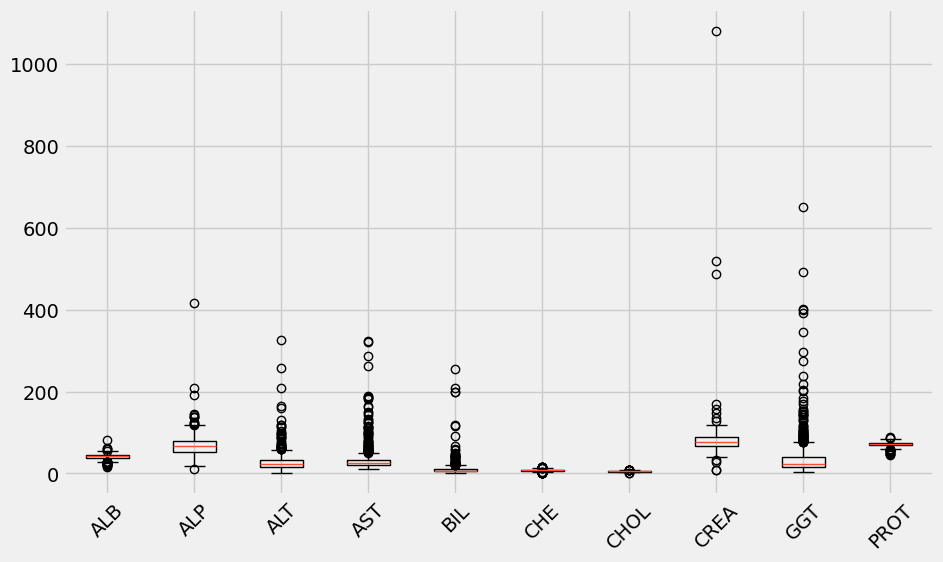

In [ ]:
import matplotlib.pyplot as plt

# tạo một danh sách các cột để vẽ
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# tạo một biểu đồ hộp dạng  cho mỗi cột
plt.figure(figsize=(10,6))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)

Category      0.000000
Age         103.089431
Sex           0.000000
ALB          88.829268
ALP         249.382114
ALT         223.723577
AST         300.227642
BIL         195.300813
CHE          19.108943
CHOL         13.222764
CREA        471.544715
GGT         490.926829
PROT        152.943089
dtype: float64


In [ ]:
from sklearn.preprocessing import RobustScaler

# Tạo đối tượng RobustScaler
robust_scaler = RobustScaler()

# Xác định các cột sẽ được chia tỷ lệ bằng RobustScaler
cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Chia tỷ lệ các cột đã chọn bằng RobustScaler
df[cols_to_scale] = robust_scaler.fit_transform(df[cols_to_scale])

In [ ]:
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)

df_outliers = df[(df[col] < q_low) | (df[col] > q_hi)]
outlier_percentage = (df_outliers.sum() / len(df_outliers)) * 100
print(outlier_percentage)   #lọc dữ liệu theo danh mục 0 hoặc 1

Category      0.000000
Age         103.089431
Sex           0.000000
ALB           0.040650
ALP           3.701887
ALT          10.292243
AST          21.351176
BIL          30.486427
CHE           0.115138
CHOL          0.790912
CREA         14.107627
GGT          17.872905
PROT         -1.871251
dtype: float64


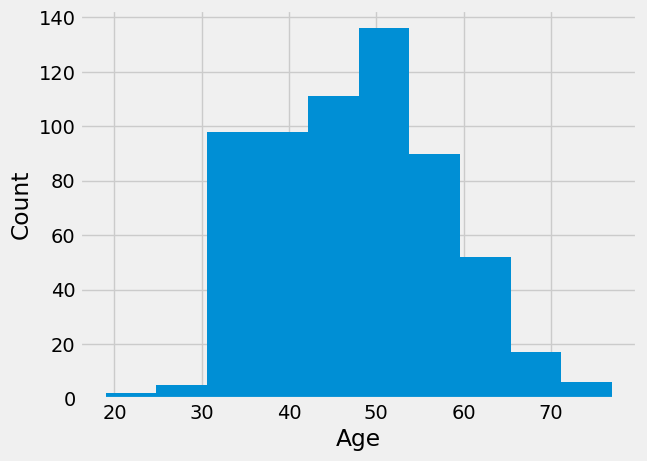

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

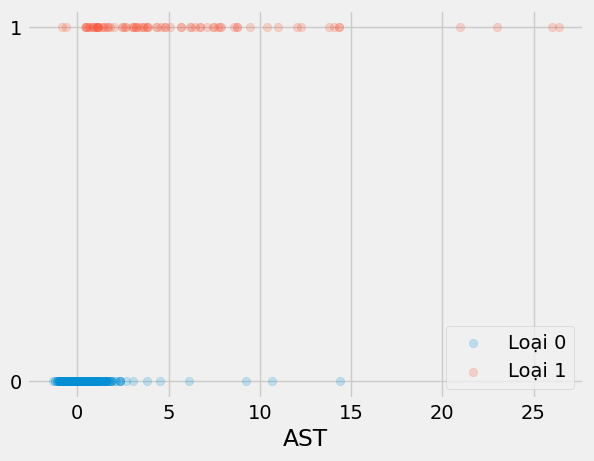

In [ ]:
# lọc dữ liệu theo danh mục 0 hoặc 1
df_cat0 = df[df['Category']==0]
df_cat1 = df[df['Category']==1]

# vẽ biểu đồ phân tán cho danh mục 0 và 1 riêng biệt
plt.scatter(df_cat0['AST'], np.zeros_like(df_cat0['AST']), alpha=0.2, label='Loại 0')
plt.scatter(df_cat1['AST'], np.zeros_like(df_cat1['AST'])+1, alpha=0.2, label='Loại 1')
plt.xlabel('AST')
plt.yticks([0,1])
plt.legend()
plt.show()

Tổng số bệnh nhân nghi ngờ mắc phải: 540 
Tổng số bệnh nhân khỏe mạnh: 75 


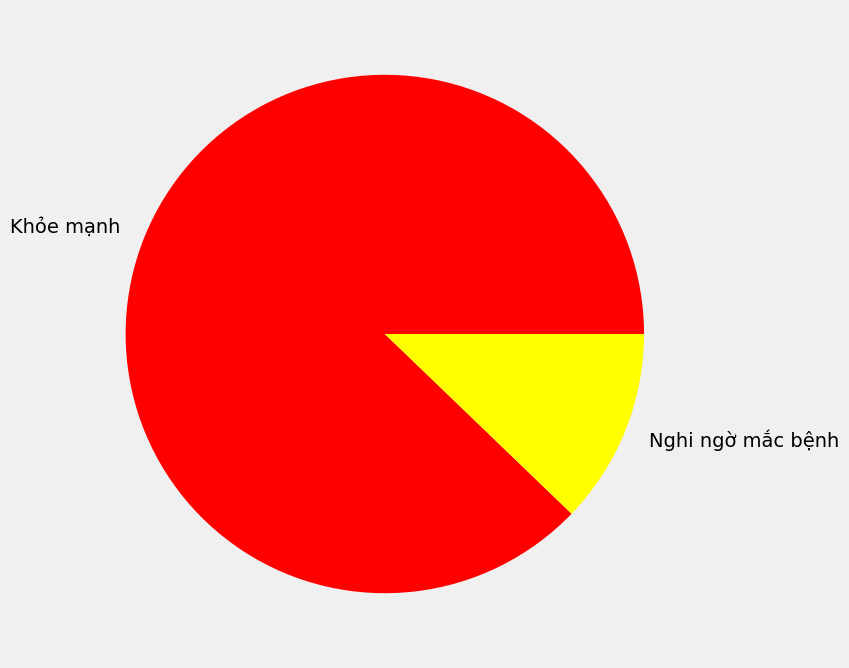

In [ ]:
print ('Tổng số bệnh nhân nghi ngờ mắc phải: {} '.format(df.Category.value_counts()[0]))
print ('Tổng số bệnh nhân khỏe mạnh: {} '.format(df.Category.value_counts()[1]))
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(),
        colors=["red","yellow"],
        labels=["Khỏe mạnh","Nghi ngờ mắc bệnh"],
        )

plt.show()

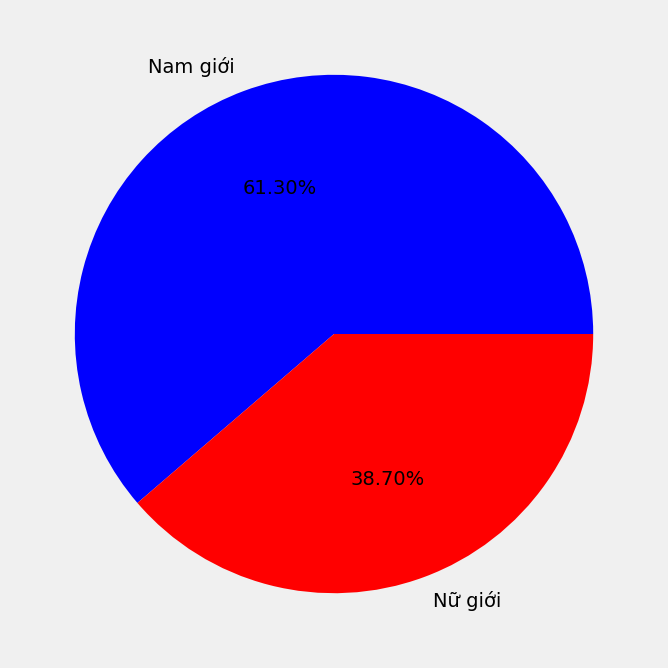

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(),
        colors=["blue","red"],
        labels=["Nam giới","Nữ giới"],
        autopct="%1.2f%%",
        )
plt.show()

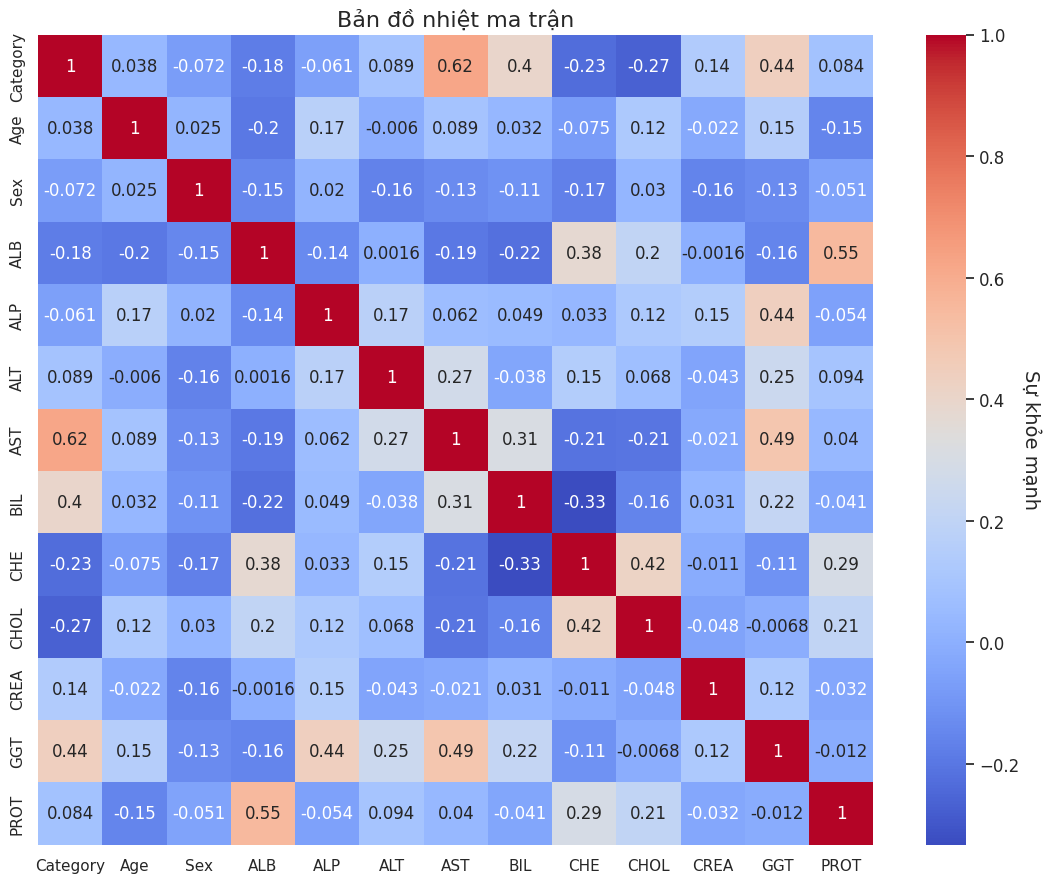

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
plt.title("Bản đồ nhiệt ma trận", fontsize=16)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap='coolwarm', ax=ax)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Sự khỏe mạnh', rotation=270, fontsize=14, labelpad=15)
plt.show()

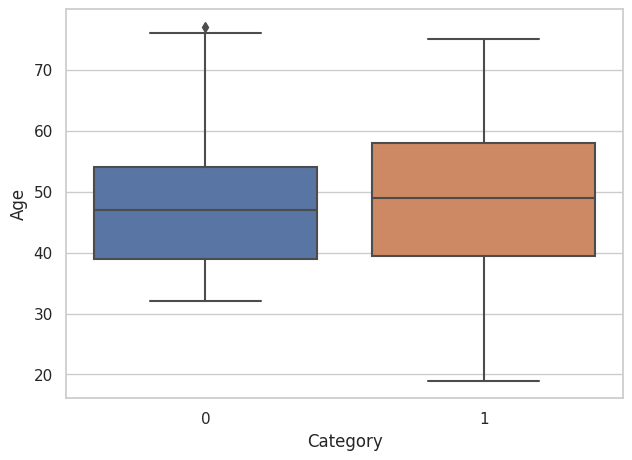

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Category", y="Age", data=df)
plt.show()

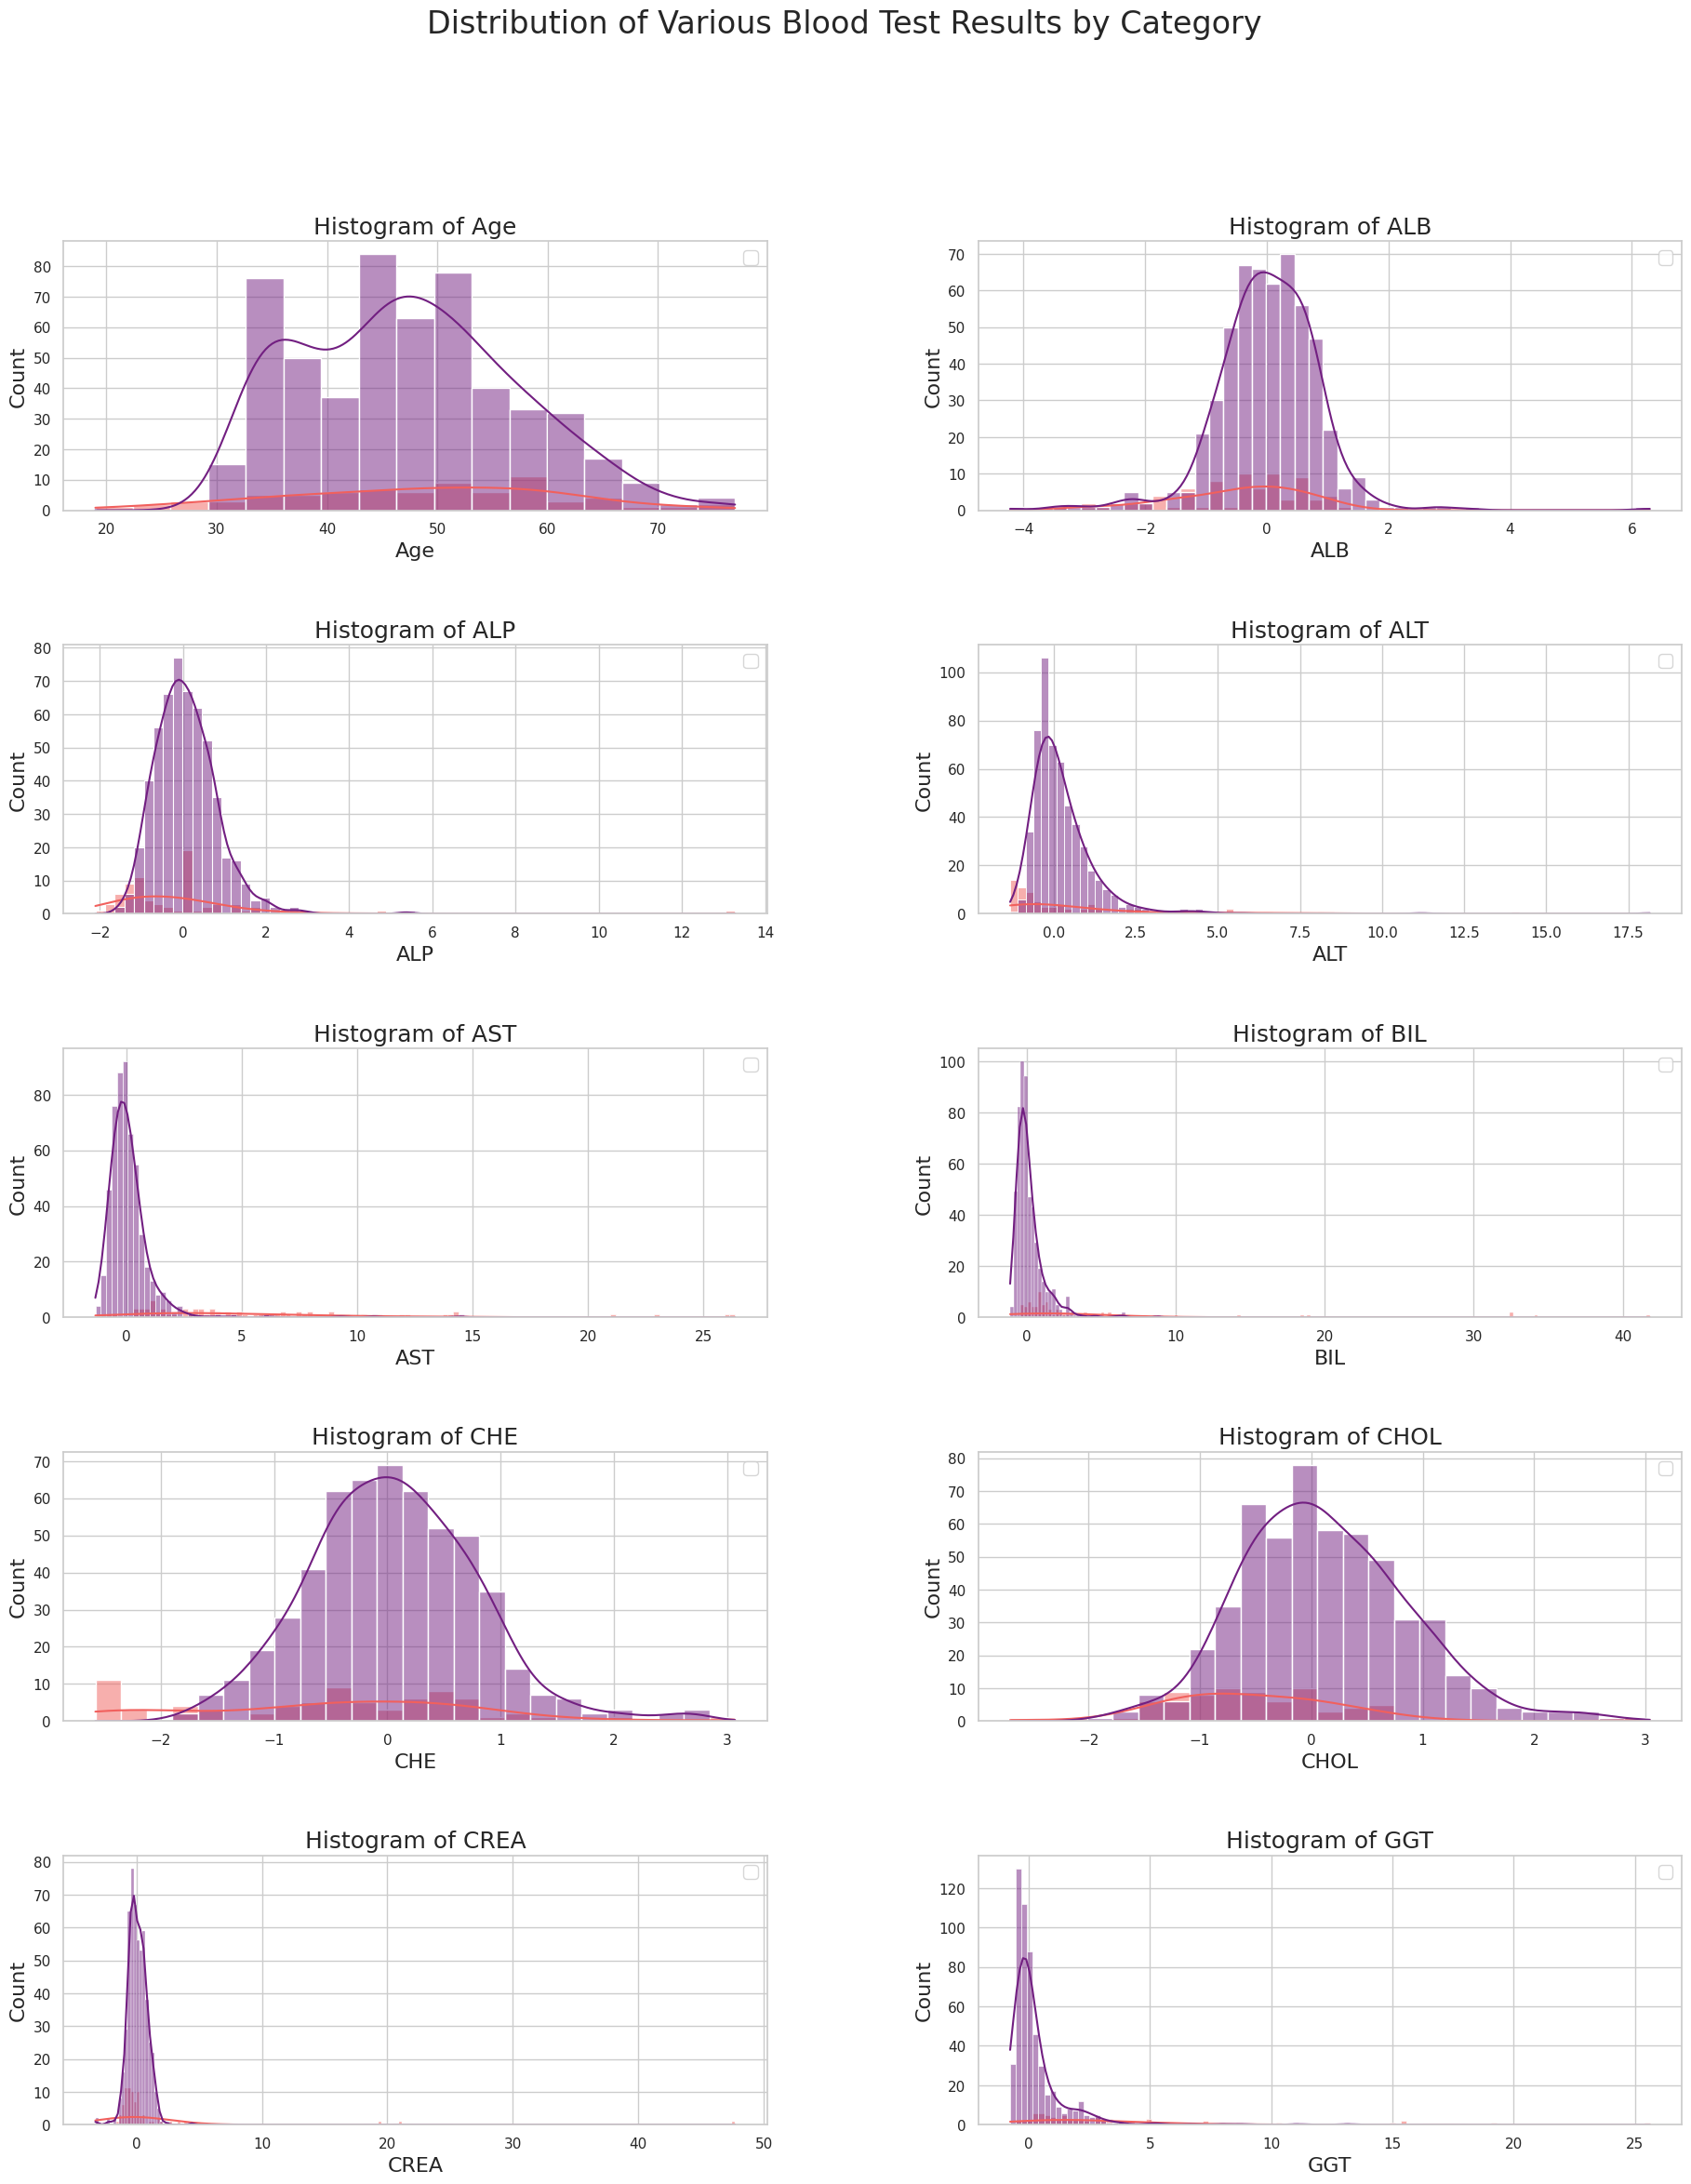

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập hình và trục
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

# Xác định các cột để vẽ
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Lặp lại từng cột và vẽ biểu đồ với nhiều danh mục
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # tăng kích thước phông chữ nhãn trục x
    axes[i].set_ylabel("Count", fontsize=16)  # tăng kích thước phông chữ nhãn trục y
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # tăng cỡ chữ tiêu đề
    axes[i].legend(fontsize=14)  # tăng kích thước phông chữ
# Thêm tiêu đề chính cho hình
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Điều chỉnh khoảng cách giữa các ô con
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # thêm khoảng cách giữa các ô con

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,-0.531250,-0.538899,-0.918919,-0.336283,0.033898,-0.500942,-1.449477,1.380952,-0.457143,-0.524590
1,32,0,-0.531250,0.136622,-0.300300,-0.106195,-0.576271,1.096045,-0.355401,-0.142857,-0.314286,0.704918
2,32,0,0.781250,0.303605,0.792793,2.362832,-0.203390,0.218456,-0.076655,0.428571,0.404082,1.163934
3,32,0,0.203125,-0.557875,0.456456,-0.292035,1.966102,-0.350282,-0.397213,0.142857,0.428571,0.573770
4,32,0,-0.421875,0.280835,0.576577,-0.097345,0.389831,0.335217,-0.689895,-0.047619,0.269388,-0.573770
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,1,-1.546875,13.278937,-1.027027,7.469027,7.237288,-1.013183,0.689895,-1.014286,25.616327,-0.606557
611,64,1,-2.796875,1.370019,-1.207207,1.637168,2.152542,-2.531073,-1.595819,-0.666667,0.514286,-0.147541
612,64,1,-2.015625,0.781784,-1.171171,6.469027,6.898305,-2.485876,-1.170732,-0.490476,1.669388,1.606557
613,46,1,-1.390625,0.060111,0.960961,3.194690,2.152542,-1.770245,-0.773519,-1.190476,1.089796,-0.196721


In [ ]:
import warnings
import joblib

# xác định danh sách các mô hình để đào tạo và các siêu tham số tương ứng của chúng để điều chỉnh
models = [
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l2"],
            "C": [0.01, 0.1, 1, 10],
            "max_iter": [500]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 20, None]
        }
    },
    {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
            "n_estimators": [100, 200, 300],
            "learning_rate": [0.01, 0.1, 1],
            "max_depth": [3, 5, 10]
        }
    },
    {
        "name": "Support Vector Machine",
        "estimator": SVC(),
        "hyperparameters": {
            "C": [0.01, 0.1, 1, 10],
            "kernel": ["linear", "rbf", "sigmoid"],
            "gamma": ["scale", "auto"]
        }
    }

]

# train (đào tạo) và điều chỉnh từng mô hình
accuracies = []
best_models = {}
for model in models:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=5
        )
        grid_search.fit(X_train, y_train)

        # đánh giá hiệu quả của mô hình
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append((model['name'], accuracy))
        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}: {grid_search.best_params_}")
        print(f"Accuracy for {model['name']}: {accuracy}")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for Logistic Regression: 0.9024390243902439
Training Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Accuracy for Random Forest: 0.9349593495934959
Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy for Gradient Boosting: 0.9349593495934959
Training Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for Support Vector Machine: 0.9024390243902439


In [ ]:
# tạo mô hình hồi quy logistic với các siêu đường kính tốt nhất
log_reg_model = LogisticRegression(
    C=10,
    max_iter=500,
    penalty='l2'
)

# tạo mô hình Forest ngẫu nhiên với các siêu tham số tốt nhất
rf_model = RandomForestClassifier(
    max_depth=10,
    n_estimators=300
)

# tạo mô hình Tăng cường Gradient với các siêu tham số tốt nhất
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100
)

# tạo mô hình Support Vector Machine với các siêu đường kính tốt nhất
svm_model = SVC(
    C=10,
    gamma='scale',
    kernel='linear'
)

In [ ]:
# đào tạo mô hình hồi quy logistic trên dữ liệu đào tạo
log_reg_model.fit(X_train, y_train)

# đưa ra dự đoán về dữ liệu thử nghiệm
y_pred_log_reg = log_reg_model.predict(X_test)

# đào tạo mô hình Forest ngẫu nhiên trên dữ liệu đào tạo
rf_model.fit(X_train, y_train)

# đưa ra dự đoán về dữ liệu thử nghiệm
y_pred_rf = rf_model.predict(X_test)

# huấn luyện mô hình Gradient Boosting trên dữ liệu huấn luyện
gb_model.fit(X_train, y_train)

# đưa ra dự đoán về dữ liệu thử nghiệm
y_pred_gb = gb_model.predict(X_test)

# huấn luyện mô hình Support Vector Machine trên dữ liệu huấn luyện
svm_model.fit(X_train, y_train)

# đưa ra dự đoán về dữ liệu thử nghiệm
y_pred_svm = svm_model.predict(X_test)

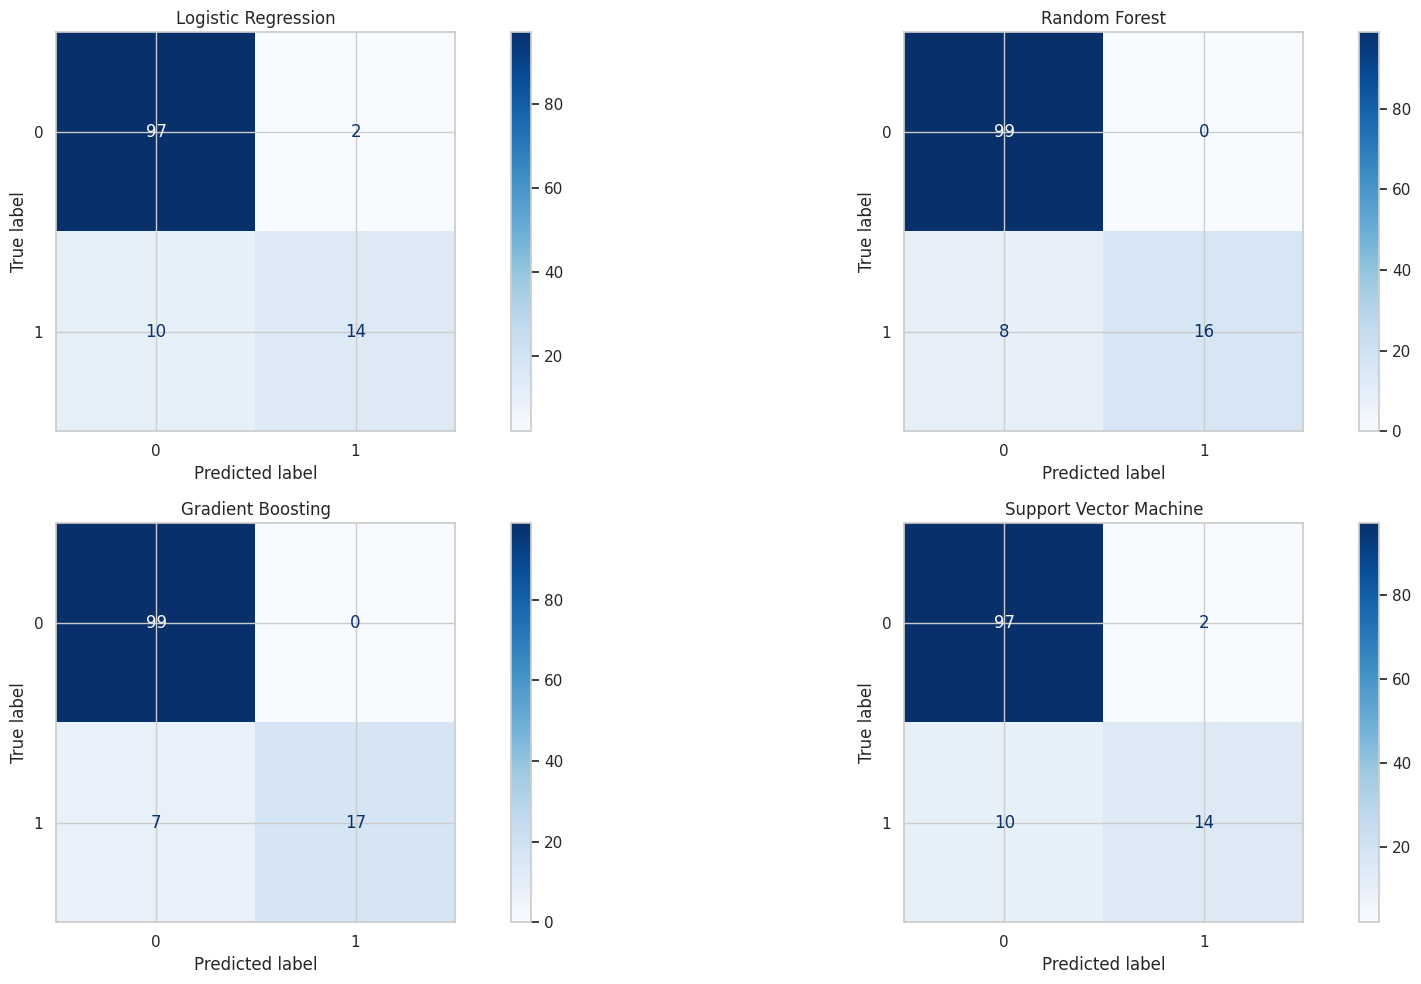

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# xác định các mô hình và tên
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector Machine': svm_model
}

# tạo một lưới subplot với 2 hàng và 2 cột
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# lặp lại các mô hình và vẽ ma trận nhầm lẫn trong ô con tương ứng
for i, (name, model) in enumerate(models.items()):
    row = i // 2
    col = i % 2
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

plt.tight_layout()
plt.show()

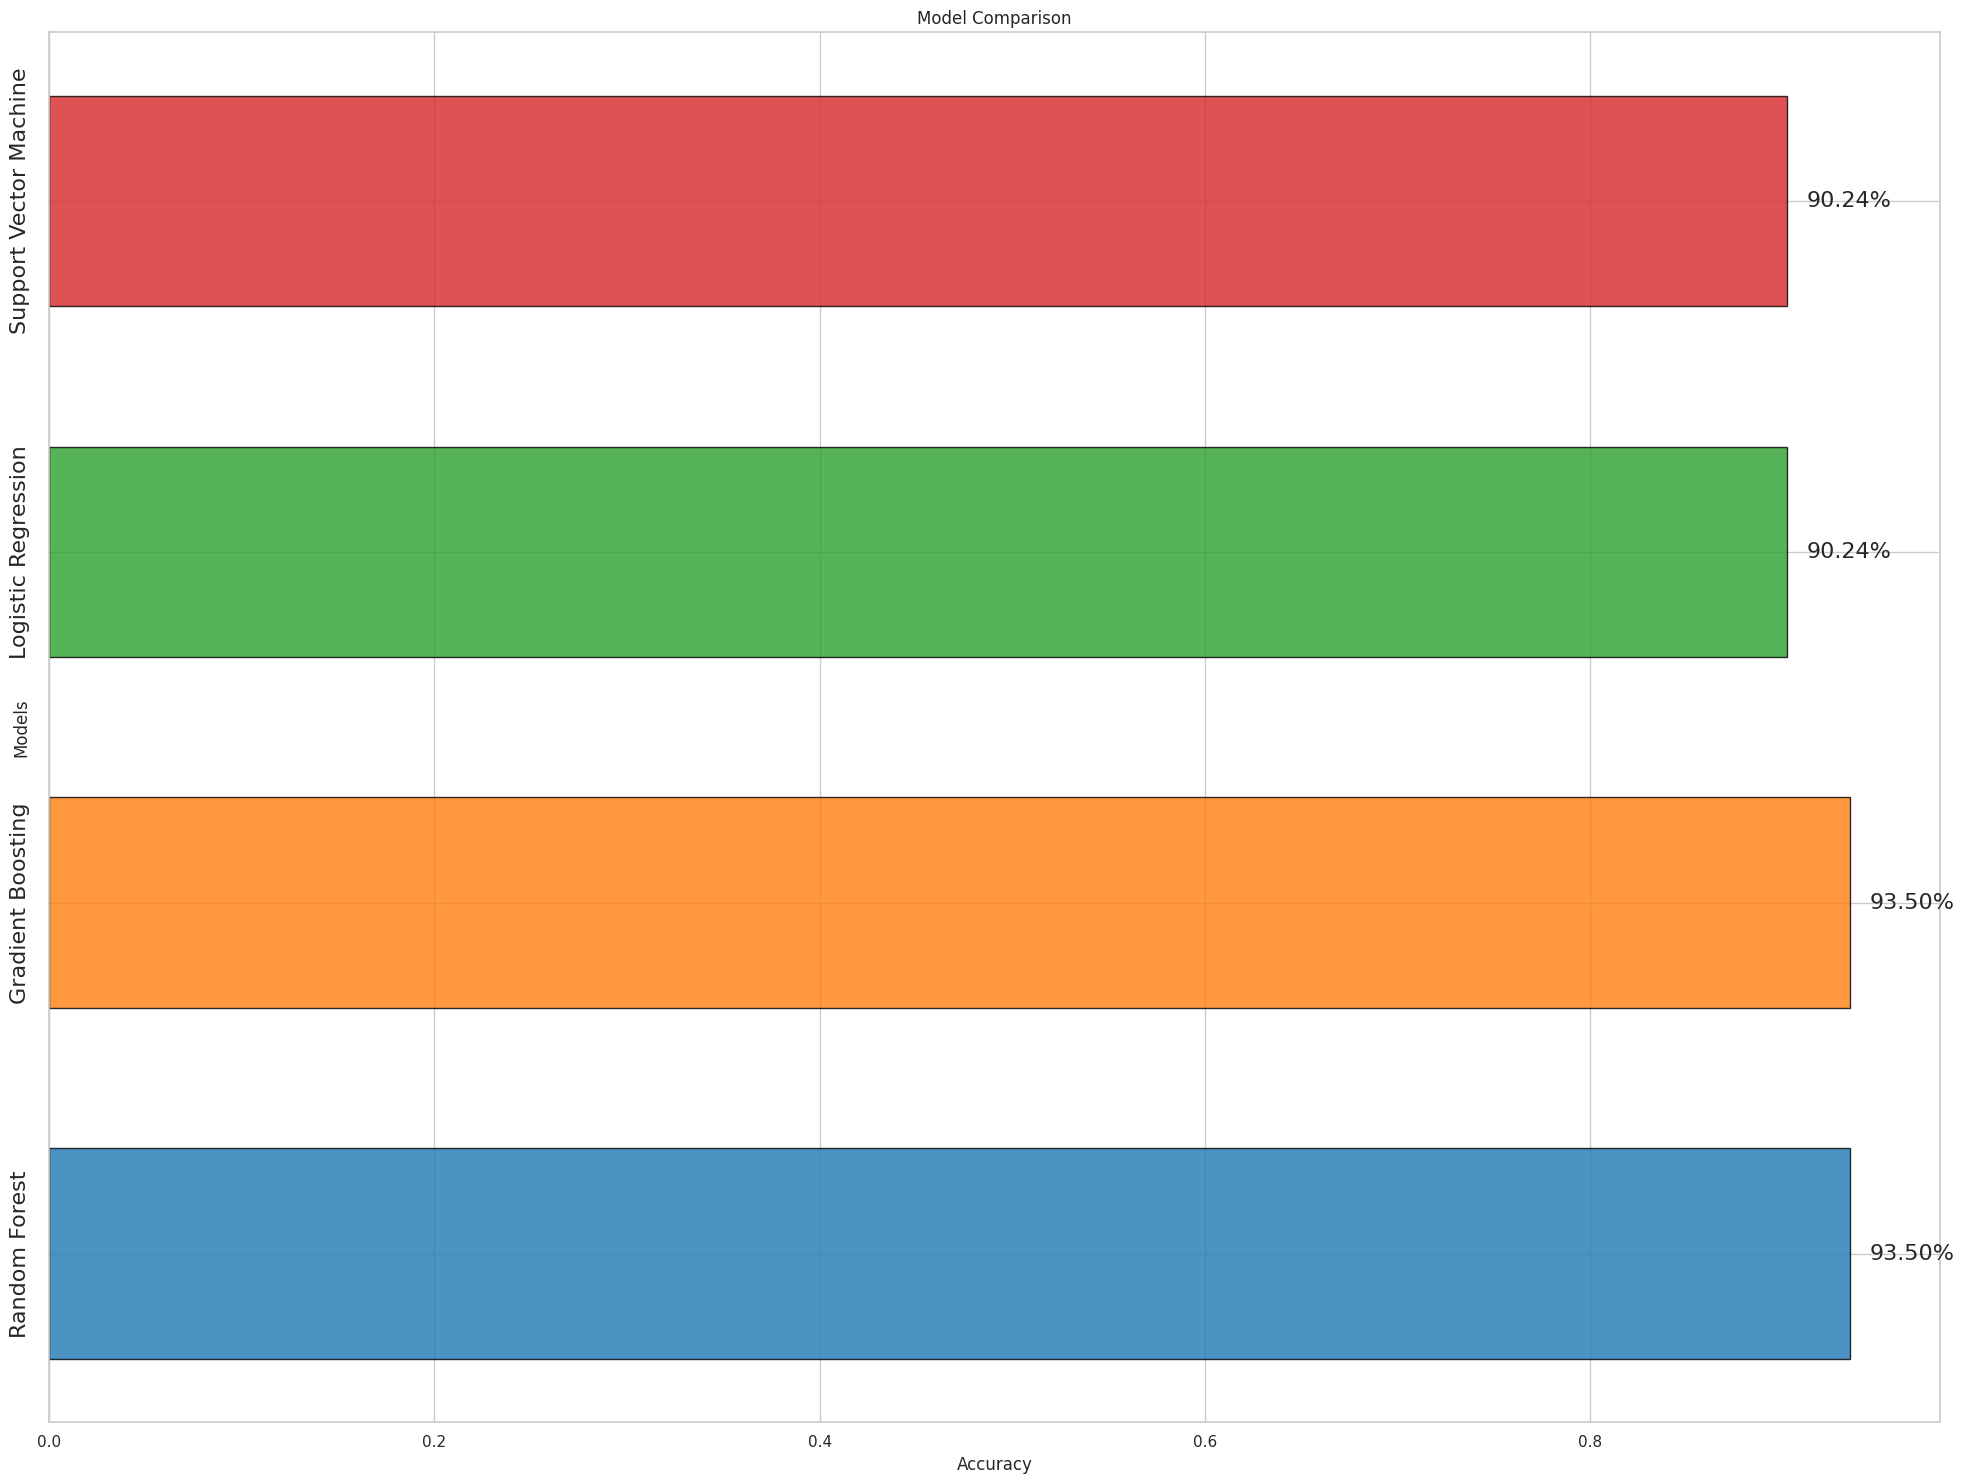

In [ ]:
import matplotlib.pyplot as plt

# Sắp xếp độ chính xác theo thứ tự giảm dần
accuracies.sort(key=lambda x: x[1], reverse=True)

# Trích xuất tên mô hình và độ chính xác
names, values = zip(*accuracies)

# Đặt lược đồ màu
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Tạo biểu đồ thanh
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Thêm nhãn vào các thanh
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)

# Đặt nhãn và tiêu đề trục
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')


# Điều chỉnh bố cục và lưu
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

In [ ]:
accuracy = gb_model.score(X_test, y_test)
print(f"Accuracy of gb_model: {accuracy:.2f}")

Accuracy of gb_model: 0.94


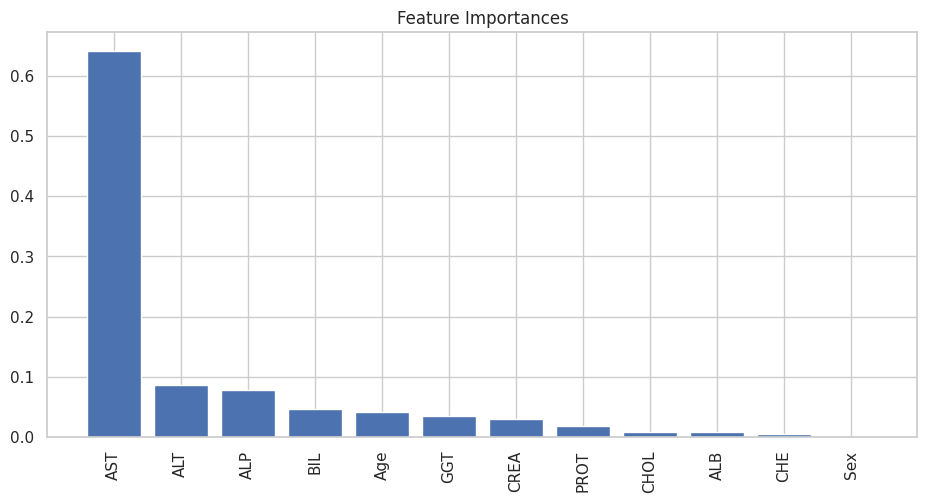

In [ ]:
import matplotlib.pyplot as plt

# phù hợp với mô hình
gb_model.fit(X_train, y_train)

# nhận tầm quan trọng của tính năng
importances = gb_model.feature_importances_

# lấy tên tính năng
feature_names = X.columns

# sắp xếp các tính năng quan trọng theo thứ tự giảm dần
indices = np.argsort(importances)[::-1]

# tầm quan trọng của tính năng
plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.show()

In [ ]:
import pickle
best_model=gb_model
# lưu mô hình vào đĩa
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
[ ]


[]

In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/index.html
<html>
<head>
    <meta charset="UTF-8">
    <title>Hepatitis C Prediction</title>
</head>
<body>
    <h1>Hepatitis C Prediction</h1>
    <form method="post" action="{{ url_for('predict') }}">
        <label for="age">Age:</label><br>
        <input type="number" id="age" name="age" required><br>

        <label for="gender">Gender:</label><br>
        <input type="radio" id="male" name="gender" value="Male" required>
        <label for="male">Male</label><br>
        <input type="radio" id="female" name="gender" value="Female" required>
        <label for="female">Female</label><br>

        <label for="fever">Fever:</label><br>
        <input type="radio" id="yes" name="fever" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="fever" value="No" required>
        <label for="no">No</label><br>

        <label for="nausea">Nausea:</label><br>
        <input type="radio" id="yes" name="nausea" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="nausea" value="No" required>
        <label for="no">No</label><br>

        <label for="fatigue">Fatigue:</label><br>
        <input type="radio" id="yes" name="fatigue" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="fatigue" value="No" required>
        <label for="no">No</label><br>

        <label for="malaise">Malaise:</label><br>
        <input type="radio" id="yes" name="malaise" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="malaise" value="No" required>
        <label for="no">No</label><br>

        <label for="anorexia">Anorexia:</label><br>
        <input type="radio" id="yes" name="anorexia" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="anorexia" value="No" required>
        <label for="no">No</label><br>

        <label for="liver_big">Liver Big:</label><br>
        <input type="radio" id="yes" name="liver_big" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="liver_big" value="No" required>
        <label for="no">No</label><br>

        <label for="liver_firm">Liver Firm:</label><br>
        <input type="radio" id="yes" name="liver_firm" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="liver_firm" value="No" required>
        <label for="no">No</label><br>

        <label for="spleen_palpable">Spleen Palpable:</label><br>
        <input type="radio" id="yes" name="spleen_palpable" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="spleen_palpable" value="No" required>
        <label for="no">No</label><br>

        <label for="spiders">Spiders:</label><br>
        <input type="radio" id="yes" name="spiders" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="spiders" value="No" required>
        <label for="no">No</label><br>

        <label for="ascites">Ascites:</label><br>
        <input type="radio" id="yes" name="ascites" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="ascites" value="No" required>
        <label for="no">No</label><br>

        <label for="varices">Varices:</label><br>
        <input type="radio" id="yes" name="varices" value="Yes" required>
        <label for="yes">Yes</label><br>
        <input type="radio" id="no" name="varices" value="No" required>
        <label for="no">No</label><br>

        <label for="bilirubin">Bilirubin:</label><br>
        <input type="number" id="bilirubin" name="bilirubin" step=".01" min="0" max="2" required><br>

        <label for="alk_phosphate">Alkaline Phosphate:</label><br>
        <input type="number" id="alk_phosphate" name="alk_phosphate" required><br>

        <label for="sgot">SGOT:</label><br>
        <input type="number" id="sgot" name="sgot" required><br>

        <label for="albumin">Albumin:</label><br>
        <input type="number" id="albumin" name="albumin" step=".1" min="2" max="5" required><br>

        <label for="protime">Prothrombin Time:</label><br>
        <input type="number" id="protime" name="protime" required><br>

        <br><br>
        <button type="submit">Predict</button>
    </form>
</body>
</html>

Writing templates/index.html


In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
cd /drive/MyDrive/Colab Notebooks

/drive/MyDrive/Colab Notebooks


In [ ]:
# import required packages
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle
import numpy as np

In [ ]:
# create Flask app
app = Flask(__name__)
# run Flask app with ngrok
run_with_ngrok(app)
model = pickle.load(open('gb_model.pkl', 'rb'))
@app.route('/')
def home():
    return render_template('index.html')
@app.route('/getprediction', methods=['POST'])
def getprediction():
    input = [float(x) for x in request.form.values()]
    num_features = len(input)
    final_input = np.zeros((1, num_features))
    final_input[0] = input
    prediction = model.predict(final_input)
    return render_template('index.html', output='Predicted Weight in KGs: {}'.format(prediction))
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag

In [ ]:
# create Flask app
app = Flask(__name__)
# run Flask app with ngrok
run_with_ngrok(app)
model = pickle.load(open('gb_model.pkl', 'rb'))
@app.route('/')
def home():
    return render_template('index.html')
@app.route('/getprediction', methods=['POST'])
def getprediction():
    input = [float(x) for x in request.form.values()]
    num_features = len(input)
    final_input = np.zeros((1, num_features))
    final_input[0] = input
    prediction = model.predict(final_input)
    return render_template('index.html', output='Predicted Weight in KGs: {}'.format(prediction))
app.run()

# nhập các thư viện cần thiết
import pickle
from flask import Flask, render_template, request

# tải các đối tượng mô hình và bộ chia tỷ lệ
model = pickle.load(open('./drive/MyDrive/Colab Notebooks/input/hepatitis-c-dataset/gb_model.sav', 'rb'))
scaler = pickle.load(open('./drive/MyDrive/Colab Notebooks/input/hepatitis-c-dataset/gb_scaler.sav', 'rb'))

# khởi tạo ứng dụng Flask
app = Flask(  # Create a flask app
    __name__,
    template_folder='templates',  # Name of html file folder
    static_folder='static'  # Name of directory for static files
)

# xác định tuyến đường chỉ mục
@app.route('/')
def index():
    return render_template('index.html')

# xác định tuyến đường dự đoán
@app.route('/predict', methods=['post'])
def predict():
    # lấy các giá trị đầu vào từ biểu mẫu
    age = request.form.get('age')
    gender = request.form.get('gender')
    fever = request.form.get('fever')
    nausea = request.form.get('nausea')
    fatigue = request.form.get('fatigue')
    malaise = request.form.get('malaise')
    anorexia = request.form.get('anorexia')
    liver_big = request.form.get('liver_big')
    liver_firm = request.form.get('liver_firm')
    spleen_palpable = request.form.get('spleen_palpable')
    spiders = request.form.get('spiders')
    ascites = request.form.get('ascites')
    varices = request.form.get('varices')
    bilirubin = request.form.get('bilirubin')
    alk_phosphate = request.form.get('alk_phosphate')
    sgot = request.form.get('sgot')
    albumin = request.form.get('albumin')
    protime = request.form.get('protime')

    # tiền xử lý dữ liệu đầu vào
    X = [[age, gender, fever, nausea, fatigue, malaise, anorexia, liver_big, liver_firm, spleen_palpable, spiders, ascites, varices, bilirubin, alk_phosphate, sgot, albumin, protime]]
    X = scaler.transform(X)

    # đưa ra dự đoán
    prediction = model.predict(X)

    # trả về kết quả dự đoán
    if prediction[0] == 1:
        return render_template('index.html', prediction_text='Bệnh nhân này được chẩn đoán Mắc viêm gan C.')
    else:
        return render_template('index.html', prediction_text='Bệnh nhân này được dự đoán KHÔNG Mắc Viêm gan C.')

# chạy ứng dụng Flask
if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 1275, app)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packag